In [ ]:
!pip install face_Recognition

In [ ]:
!pip install flask-ngrok

In [ ]:
!pip install opencv_python

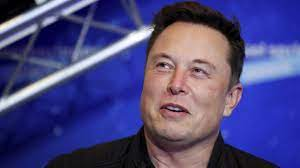

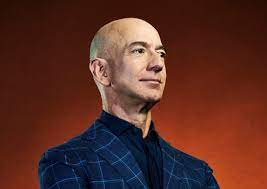

In [ ]:
import face_recognition
from google.colab.patches import cv2_imshow
import cv2
picture_1 = cv2.imread("/content/images/elon 1.jpg")
cv2_imshow(picture_1)
face_1_encoding = face_recognition.face_encodings(picture_1)[0]
picture_2 = cv2.imread("/content/images/jeff1.jpg")
cv2_imshow(picture_2)
face_2_encoding = face_recognition.face_encodings(picture_2)[0]
#picture_3 = cv2.imread("/content/images/download (1).jpeg")
#cv2_imshow(picture_3)
#face_3_encoding = face_recognition.face_encodings(picture_3)[0]
#picture_4 = cv2.imread("/content/images/IMG_5408.jpg")
#cv2_imshow(picture_4)
#face_4_encoding = face_recognition.face_encodings(picture_4)[0]

In [ ]:
known_face_encodings = [
                        face_1_encoding,
                        face_2_encoding#,
                        #face_3_encoding,
                        #face_4_encoding
]

In [ ]:
known_face_names =[
                   'Elon',
                   'Jeff'#,
                   #'Scarlet',
                   #'Soham'
]

In [ ]:
import numpy as np
def classify(file_name):
  unknown_image = cv2.imread(file_name)
  unknown_image_to_draw = cv2.imread(file_name)
  face_locations = face_recognition.face_locations(unknown_image)
  face_encodings = face_recognition.face_encodings(unknown_image, face_locations)
  for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    name = "Unknown"
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
      name = known_face_names[best_match_index]
      return name
    else:
      return 'Not Found'

In [ ]:
classify("/content/images/elon 2.jpg")

'Elon'

In [ ]:
from datetime import datetime
def Attendence(name):
  with open ('attendance_list.csv','r+') as File:
    allLines = File.readlines()
    attendanceList = []
    for line in allLines:
      entry = line.split(',')
      attendanceList.append(entry[0])
    if name not in attendanceList:
      now = datetime.now()
      dtString = now.strftime('%d/%b/%Y, %H:%M:%S')
      File.writelines(f'\n{name},{dtString}')



In [ ]:
!pip install pyngrok
!ngrok authtoken 22r2RT0b00GlHofuXp36k3Aec1F_7udaaLNQAiZtRi1FRQesJ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
import numpy as np

from flask_ngrok import run_with_ngrok

import cv2
import smtplib
from flask import Flask, render_template, request

app = Flask(__name__)
run_with_ngrok(app)

def predict_label(img_path):
  if img_path != "":
    p=classify(img_path)
    Attendence(p)
    return p
  else:
    return "Please choose an image"

@app.route("/", methods=['GET', 'POST'])

def main():
  return render_template("index.html")

@app.route("/submit", methods = ['GET', 'POST'])
def get_output():
  if request.method == 'POST':
    img = request.files['my_image']
    img_path = "static/" + img.filename
    img.save(img_path)
    print(img_path)
    p = predict_label(img_path)
    return render_template("index.html", prediction = p, img_path = img_path)

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://1518-34-132-9-45.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [29/Jan/2022 13:55:24] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Jan/2022 13:55:25] "GET /favicon.ico HTTP/1.1" 404 -


static/elonpng.png


127.0.0.1 - - [29/Jan/2022 13:55:59] "POST /submit HTTP/1.1" 200 -
127.0.0.1 - - [29/Jan/2022 13:55:59] "GET /static/elonpng.png HTTP/1.1" 200 -
